# Task 2b Visualization

In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [3]:
# Enable autoreloading if import packages are changed
%load_ext autoreload
%autoreload 2

In [4]:
# Set up python path 
import sys
import os
import cv2
import numpy as np 
import torch 
import matplotlib.pyplot as plt
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [5]:
# Read data
img1 = cv2.imread("../data/Chess.png")
color1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
gray1 = cv2.cvtColor(color1, cv2.COLOR_RGB2GRAY)

img2 = cv2.imread("../data/ChessRotated.png")
color2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
gray2 = cv2.cvtColor(color2, cv2.COLOR_RGB2GRAY)

## Visualize pattern 

Pattern shape: (256, 4)


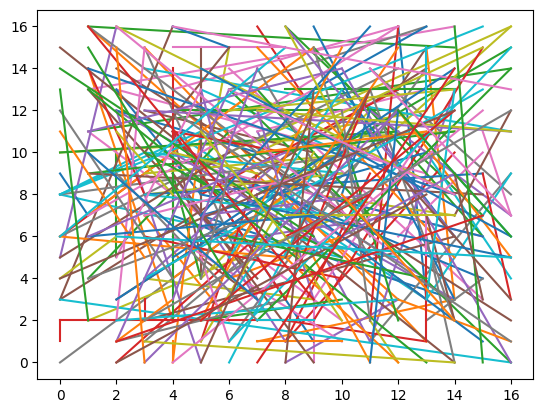

In [6]:
sys.path.append('..')

from rbrief import RBRIEF

seed = int(open('../group_id.txt', 'r').read())
brief = RBRIEF(seed=seed) 

pattern = brief.pattern('cpu').numpy()
print('Pattern shape:', pattern.shape)

f = plt.figure() 
for i in range(0, pattern.shape[0]):
    start = pattern[i, 0:2]
    end = pattern[i, 2:4]
    plt.plot(start, end)

## Compute and Visualize Matches

tensor([ 19,  70,  74, 104, 105, 121, 162, 171, 211, 272, 300, 320, 328])
torch.Size([9, 2])


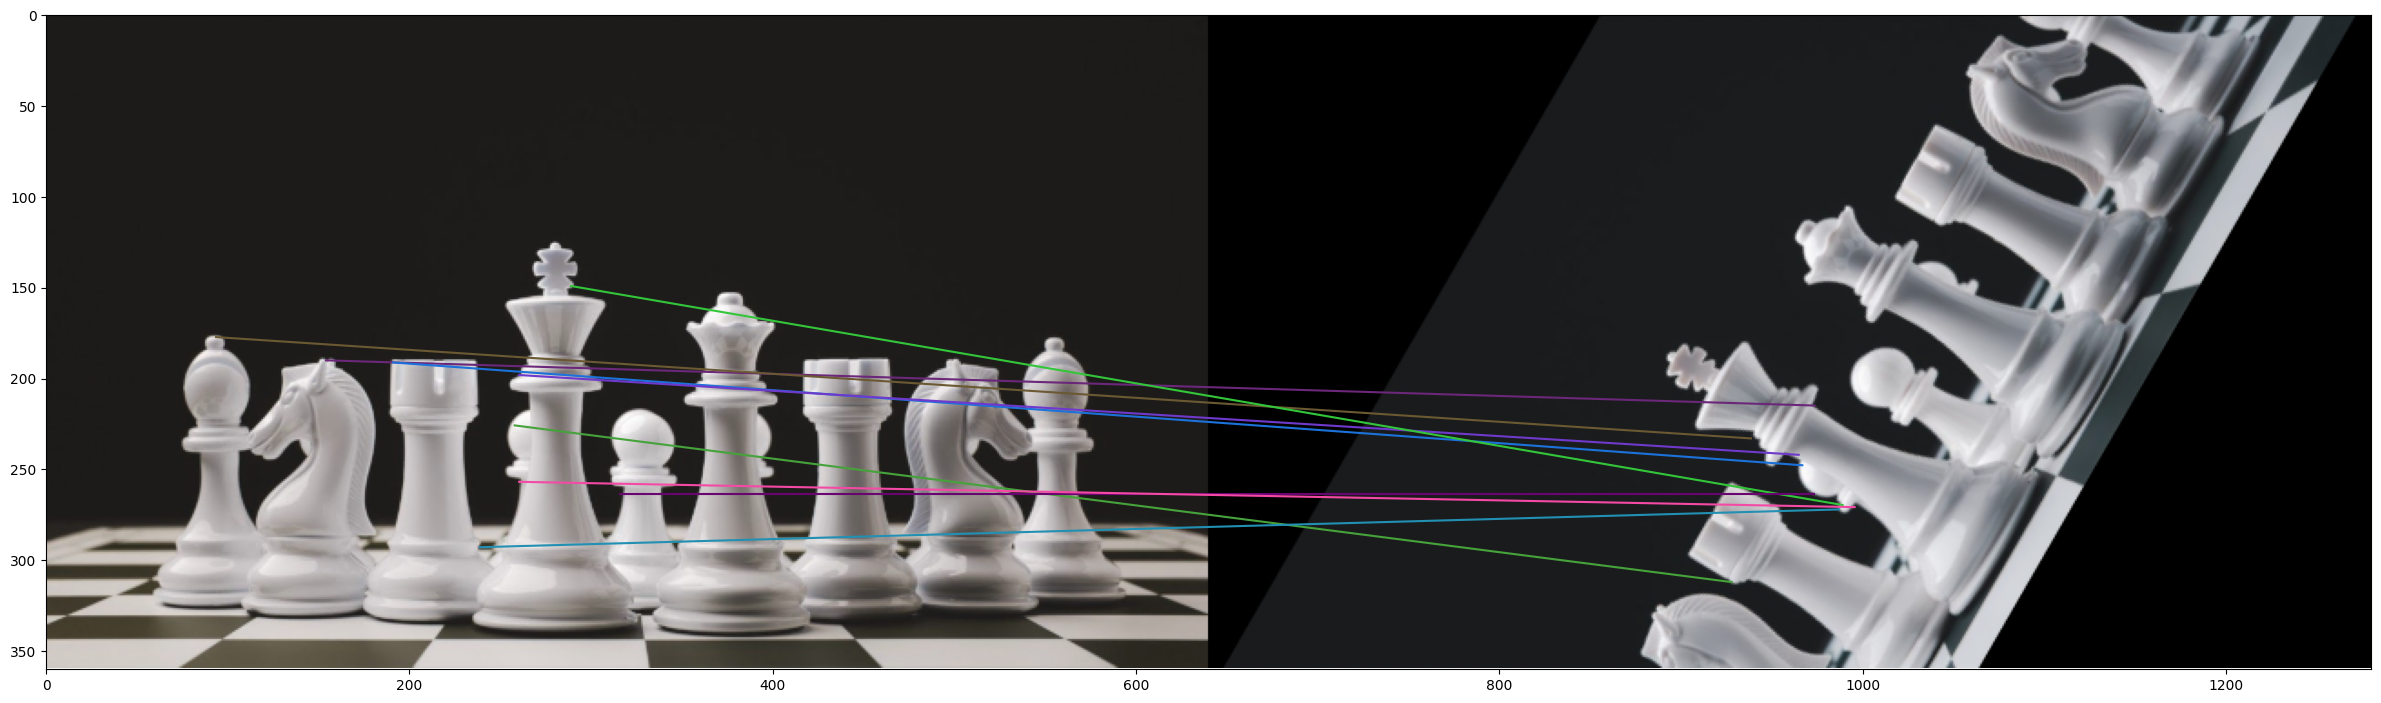

In [16]:
group_id = int(open('../group_id.txt', 'r').read())

img1 = cv2.imread("../data/Chess.png")
color1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
gray1 = cv2.cvtColor(color1, cv2.COLOR_RGB2GRAY)

img2 = cv2.imread("../data/ChessRotated.png")
color2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
gray2 = cv2.cvtColor(color2, cv2.COLOR_RGB2GRAY)

# Fields in keypoints from SIFT detector:
# x, y, angle, octave, response, size
keypoints1 = torch.tensor(np.loadtxt('keypoints1.txt'), device=device)
keypoints2 = torch.tensor(np.loadtxt('keypoints2.txt'), device=device)

brief = RBRIEF(seed=group_id)
desc1, kp1 = brief.compute_descriptors(torch.tensor(gray1, device=device), keypoints1)
desc2, kp2 = brief.compute_descriptors(torch.tensor(gray2, device=device), keypoints2)

from skimage.feature import plot_matches
import matplotlib.pyplot as plt
import cv2

from task2a.match import match

matches = match(
        descriptors1=desc1,
        descriptors2=desc2,
        device=device,
        dist="hamming",
        ratio=0.6,
        threshold=500,
    )

print(matches.shape)
fig, axs = plt.subplots(figsize=(30.0, 20.0))
k = 10
plot_matches(
    axs,
    img1,
    img2,
    kp1[:,0:2].cpu(),
    kp2[:,0:2].cpu(),
    matches[:k, :],
    alignment="horizontal",
    only_matches=True,
)

plt.show()